# 6. Проверка гипотез по увеличению выручки в интернет-магазине - оценить результаты A/B теста

**Задача - Проанализируйте A/B-тест:**
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. - Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

*Примите решение по результатам теста и объясните его.*
*Варианты :*

1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
hyp = pd.read_csv('/datasets/hypothesis.csv') 

In [3]:
hyp.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [4]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hyp.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
display('DataSet hyp:', hyp[hyp.duplicated(keep=False)])

'DataSet hyp:'

,Hypothesis,Reach,Impact,Confidence,Efforts


In [7]:
hyp.columns = map(str.lower, hyp.columns)

In [8]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируемих по убыванию приоритета
hyp['ICE'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']
hyp_ICE = hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hyp_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


In [9]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируемих по убыванию приоритета
hyp['RICE'] = hyp['impact'] * hyp['reach'] * hyp['confidence'] / hyp['efforts']
hyp_RICE = hyp[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
hyp_RICE

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [10]:
# Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE
hyp.sort_values(by='ICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Параметр reach, то есть охват пользователей, который есть в методе RICE изменил приоретизацию гипотез. Но задача 4 в обоих методах осталась на последнем месте.

In [11]:
# Загрузка данных и подготовка их к анализу
orders = pd.read_csv('/datasets/orders.csv') #читаем файл
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
# Переименуем столбцы и переведем столбец с датой в тип даты и проверим дубликаты
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',orders.duplicated().sum())

Количество дубликатов: 0


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv') #читаем файл
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Переведем столбец с датой в тип даты и проверим дубликаты
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print('Количество дубликатов:',visitors.duplicated().sum())

Количество дубликатов: 0


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [19]:
visitors.describe().round(2)

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'visitors'}>]], dtype=object)

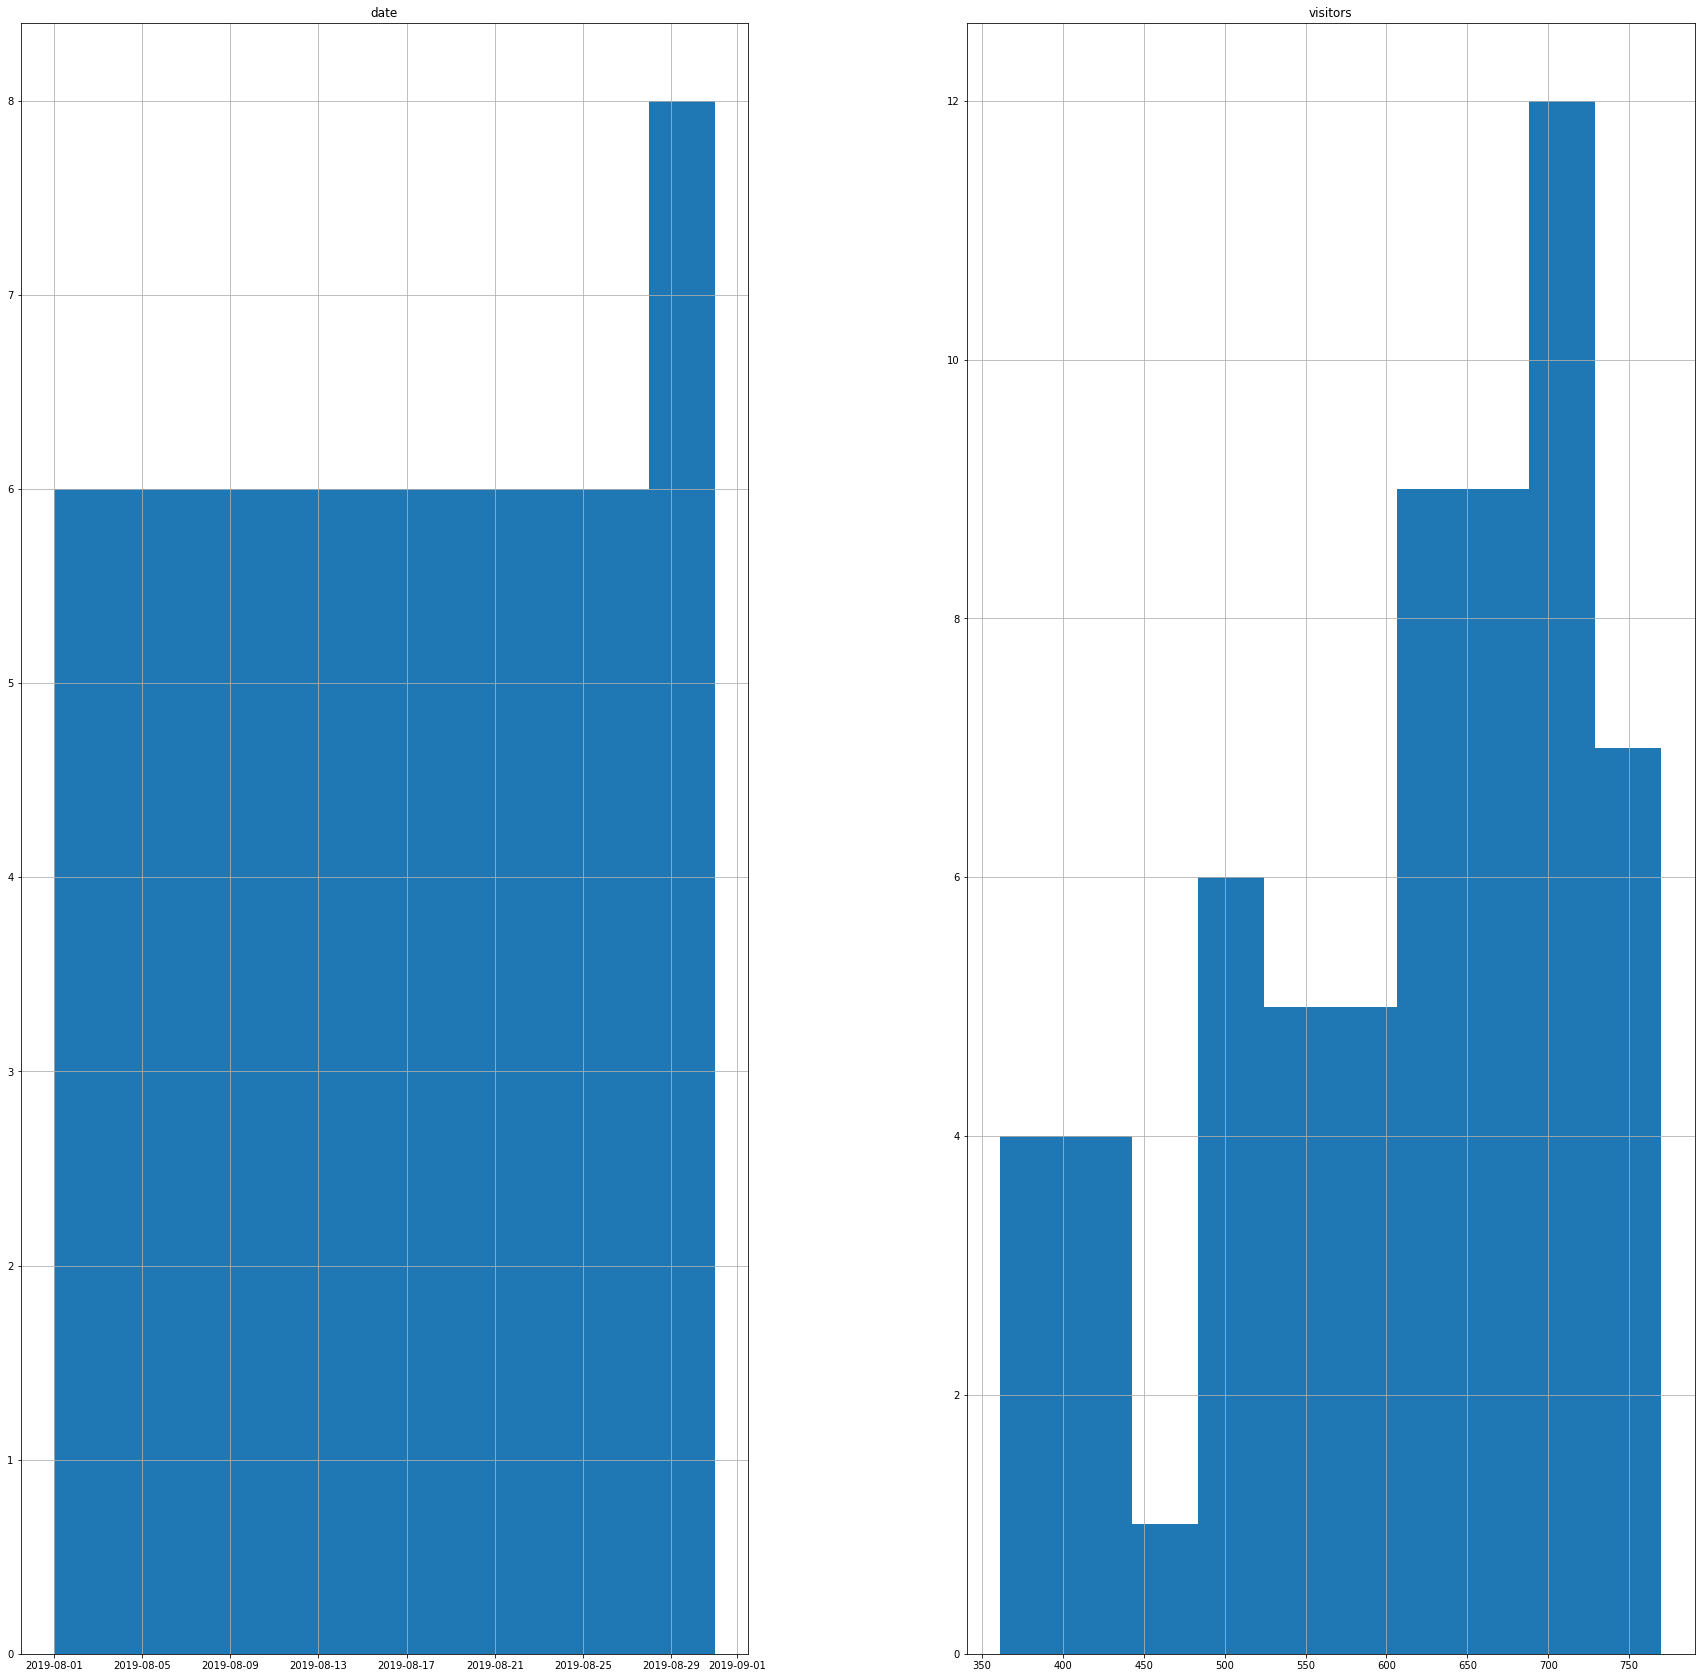

In [20]:
visitors.hist(figsize=(30, 30))

                                      Тестирование

Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders.
Избавимся от дубликатов методом drop_duplicates().

Объявим переменную ordersAggregated, содержащую:

- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

Объявим переменную visitorsAggregated, содержащую:

- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group' в указанном порядке.

Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

Присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Выведим первые 5 строк переменной cumulativeData

In [21]:
orders.groupby('visitor_id').agg({'group' : 'nunique' }).query('group > 1').count()

group    58
dtype: int64

In [22]:
users_AB = orders.groupby('visitor_id').agg({'group' : 'nunique' }).reset_index().query('group > 1').count()
users_AB

visitor_id    58
group         58
dtype: int64

In [23]:
#удаляем 58 пользователей , попавших в обе группы
orders = orders.query('visitor_id not in @users_AB')
orders.groupby('visitor_id').agg({'group' : 'nunique' }).reset_index().query('group > 1').count()

visitor_id    58
group         58
dtype: int64

In [24]:
visitors_count = visitors.groupby(['group']).sum().reset_index()
display(visitors_count)

,group,visitors
0,A,18736
1,B,18916


In [25]:
visitors_AB = 1 - visitors_count['visitors'][0]/visitors_count['visitors'][1]
visitors_AB

0.009515753859166809

Для А\В теста группы должны быть равными или +- 1%
у нас - меньше 1%

In [26]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [27]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [28]:
datesGroups = orders [['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


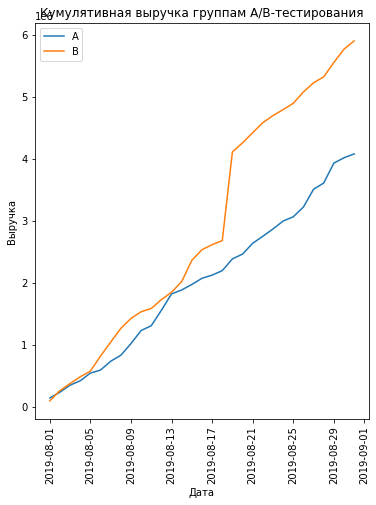

In [29]:
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах,
# выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням по группам.

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.subplots_adjust(top=1.5)
plt.show()


В середине теста сегмент B подскочил и вырвался сильно вперед. Вероятнее всего аномально большие заказы влияют для результат теста. Этот момент нужно учесть в результате.

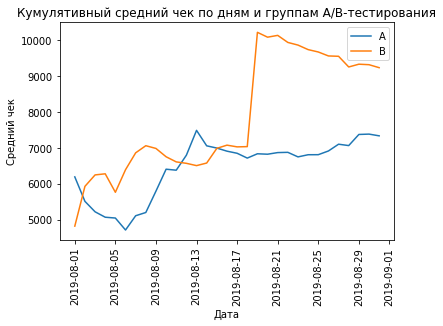

In [30]:
# Построим графики кумулятивного среднего чека по дням по группам.

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.show()

Аналогично прошлому графику в тот же момент у сегмента В подсокочил кумулятивный средний чек. Но По графику видно, что он продолжает колебаться.

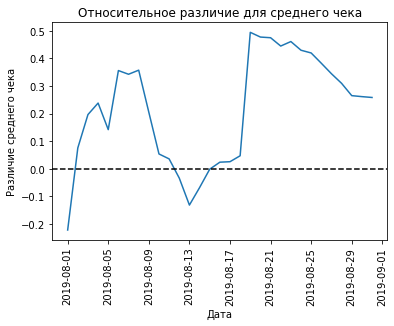

In [31]:
# Построим график относительно различия кумулятивного среднего чека группы B к группе A.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Различие среднего чека')
plt.title("Относительное различие для среднего чека")
plt.xticks(rotation=90)
plt.show()

В нескольких точках график различия между сегментами резко «скачет», видимо тогда были совершены аномальные заказы. Но в основном график расположен выше нуля.

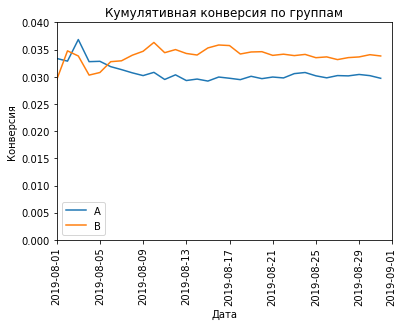

In [32]:
# Построим график кумулятивной конверсии по группам.
# Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей
# в указанной группе в указанный день. Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Кумулятивная конверсия по группам")
plt.xticks(rotation=90)
plt.show()

В начале теста сегмент А имел большую конверсию, затем он немного упал и установился примерно около одного значения, в отличии от сегмента В, который возрос выше сегмента А и также установился в пределах одного значения.

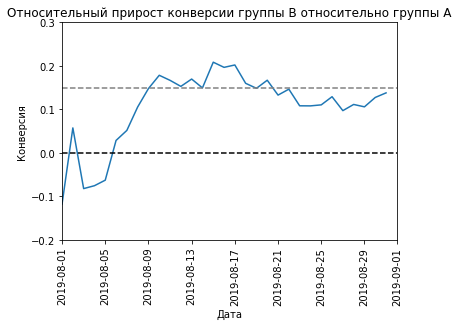

In [33]:
# Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, 
# чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. Сохраним в переменной mergedCumulativeConversions. Построим график относительного различия кумулятивной конверсии группы B к группе A. Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
#plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01', format = '%Y-%m-%d'),
             pd.to_datetime('2019-09-01', format = '%Y-%m-%d'), -0.2, 0.3])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Относительный прирост конверсии группы В относительно группы А")
plt.xticks(rotation=90)
plt.show()

Почти с самого начала теста группа B лидирует относительно группы А. Но не стоит говорить, что она зафиксировалась возле определенной цифры, но прирост становится примерно на 15%.

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


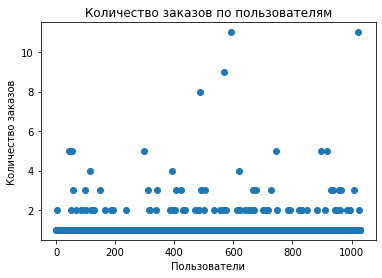

In [34]:
# Построим точечный график количества заказов по пользователям.

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

Пользователи, которые сделали более 2 заказов встречаются редко. Для того, чтобы узнать аномалия это или нет, посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [35]:
print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


In [36]:
print(np.percentile(ordersByUsers['transaction_id'], [ 95, 99]))

[2. 4.]


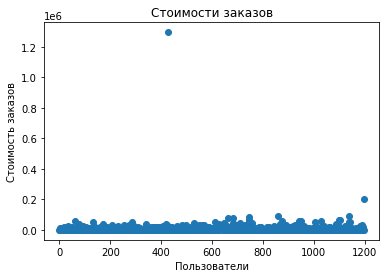

In [37]:
# Построим точечный график стоимостей заказов.

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.show()

Есть 2 выброса в районе 1 250 000, который выглядит весьма аномально, и 200 000.
Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [38]:
print(orders.head(10))
print(np.percentile(orders['revenue'] , [95, 99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transaction_id'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
А пользователям без заказов — нули. 
Посчитаем статистическую значимость различия среднего количества заказов по результатам двух недель теста.

Для расчета р-value, используем напараметрический тест Уилкоксона-Манна-Уитни, так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения.
Так же сформируем нулевую и альтернативную гипотезы. 

Нулевая гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке не значительна и сделать вывод о различии нельзя, альтернативная гипотеза говорит о том, что статистическая значимость в количестве заказов и среднем чеке значитаельная и между выборками имеется статистическая значимость.
Порогом статистической значимости установим alpha=.05

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [40]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу.

Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. 

Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

In [42]:
# Сравним "средние чеки" по сырым данным, а затем проделаем те же самые действия с выборкой без выбросов.

print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет.
Относительное различие между чеками около 26%.
Почистим данные и посчитаем те же метрики.

Приступаем к подготовке очищенных от аномалий данных.

Напомним, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям.
А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей.
Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. 

Удалять нужно именно пользователей — сначала определим аномальные заказы.

Затем пользователей, совершивших их, и добавим их в список аномальных. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 10 000 — usersWithExpensiveOrders. 
Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.019
Относительные различия: 0.144


Как и в случае с сырым данными, статистическая значимость достигнута. Сегмент В лучше сегмента А.

In [45]:
# Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.979
Относительные различия: -0.017


P-value увеличился, но и разница между сегментами сократилась с 26% до -17%. После удаления выбросов в данных меньше шума.

**Выводы**

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

График различия среднего чека колеблется: он-то и позволил вам найти аномалии.

Сделать из этого графика определённые выводы нельзя.

Есть вариант остановить тест, признать победу группы В.